In [2]:
import pandas as pd
import mysql.connector

import seaborn as sns
import matplotlib.pyplot as plt

you must have mysql server in your system for pandas to query Dump20251024.sql file from dumps folder

In [3]:

def get_dataframe(query, db='gdb0041'):
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='awase',
        database=db
    )
    return pd.read_sql(query, conn)


### Request 3

In [50]:
query='''
SELECT 
    segment,
    COUNT(DISTINCT product_code) AS Product_count
FROM dim_product
GROUP BY segment
ORDER BY Product_count DESC; ''' 

In [51]:
df=get_dataframe(query)
print(df)

       segment  Product_count
0     Notebook            129
1  Accessories            116
2  Peripherals             84
3      Desktop             32
4      Storage             27
5   Networking              9


C:\Users\jink7\AppData\Local\Temp\ipykernel_19744\603900850.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


#### plot

C:\Users\jink7\AppData\Local\Temp\ipykernel_19744\3954895314.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='Product_count', data=df,palette='Set2')


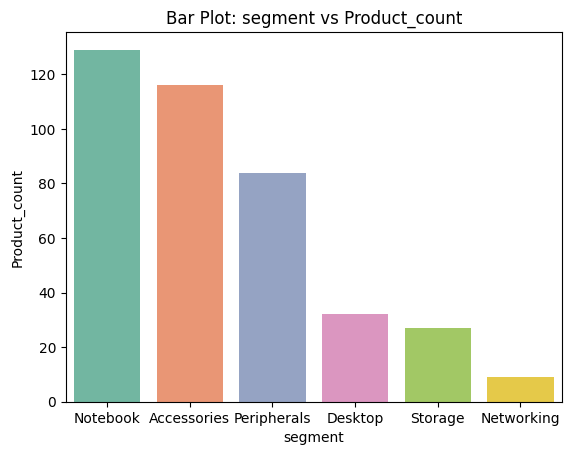

In [61]:
sns.barplot(x='segment', y='Product_count', data=df,palette='Set2')
plt.title('Bar Plot: segment vs Product_count')
plt.show()

In [4]:
query='''
WITH unique_products AS (
    SELECT
        p.segment, 
        COUNT(DISTINCT CASE WHEN fiscal_year = 2020 THEN s.product_code END) AS product_count_2020,
        COUNT(DISTINCT CASE WHEN fiscal_year = 2021 THEN s.product_code END) AS product_count_2021
    FROM fact_sales_monthly s
    JOIN dim_product p ON s.product_code = p.product_code
    GROUP BY p.segment
)
SELECT 
    *,
    product_count_2021 - product_count_2020 AS difference
FROM unique_products
ORDER BY difference DESC;
'''

In [5]:
df=get_dataframe(query)
print(df)

C:\Users\jink7\AppData\Local\Temp\ipykernel_16908\603900850.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


       segment  product_count_2020  product_count_2021  difference
0  Accessories                  69                 103          34
1     Notebook                  92                 108          16
2  Peripherals                  59                  75          16
3      Desktop                   7                  22          15
4      Storage                  12                  17           5
5   Networking                   6                   9           3


C:\Users\jink7\AppData\Local\Temp\ipykernel_19744\3298994163.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




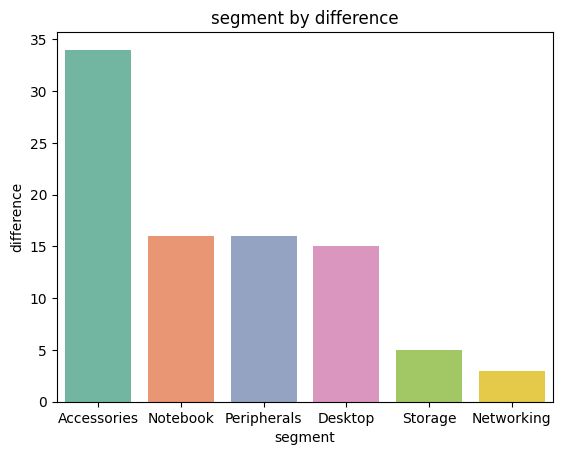

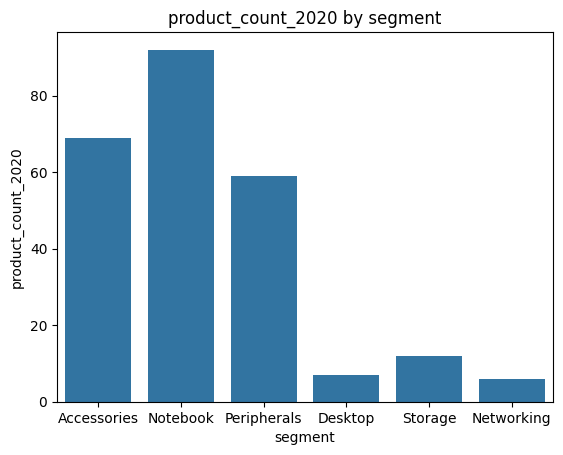

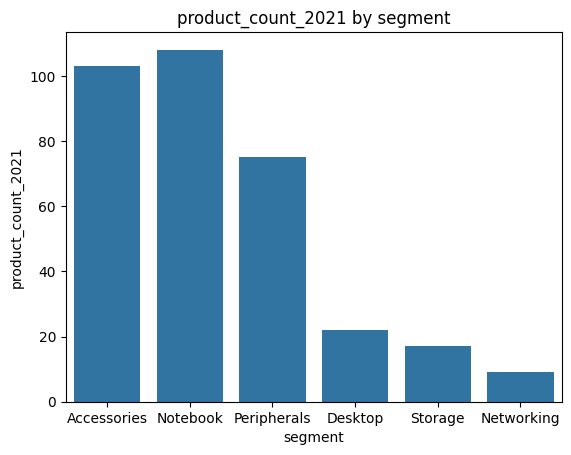

In [85]:

numerical_cols = ['product_count_2020','product_count_2021']
sns.barplot(x='segment', y= 'difference', data=df,palette='Set2')
plt.title('segment by difference')
plt.show()
for col in numerical_cols:
    sns.barplot(x='segment', y=col, data=df)
    plt.title(f'{col} by segment')
    plt.show()

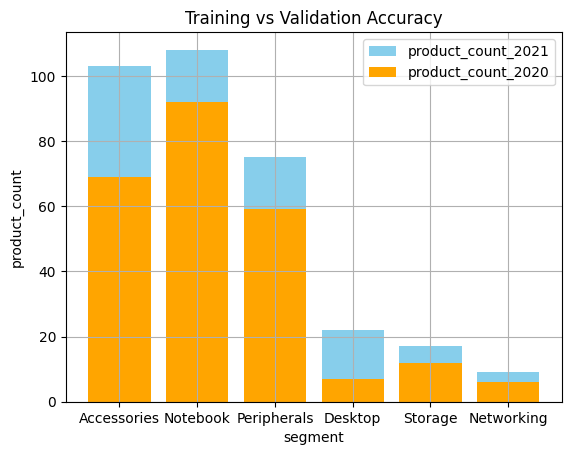

In [17]:
plt.bar(df['segment'], df['product_count_2021'], color='skyblue')
plt.bar(df['segment'], df['product_count_2020'], color='orange')

plt.xlabel('segment')
plt.ylabel('product_count')
plt.title('Training vs Validation Accuracy')
plt.legend(['product_count_2021','product_count_2020'])
plt.grid(True)
plt.show()

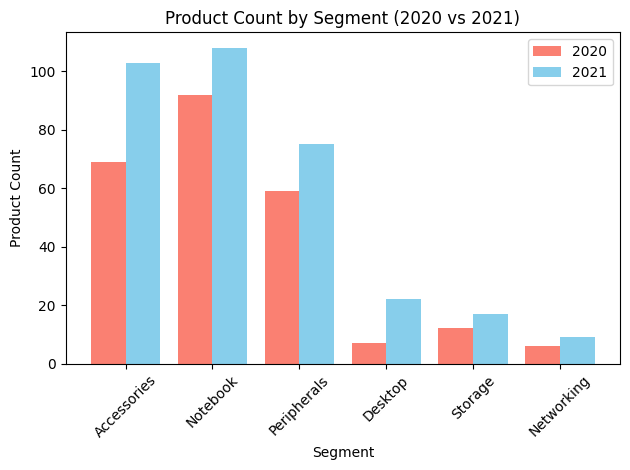

In [18]:
# Assuming df is already defined
segments = df['segment']
count_2020 = df['product_count_2020']
count_2021 = df['product_count_2021']
x = range(len(segments))

# Plotting grouped bars
plt.bar(x, count_2020, width=0.4, label='2020', color='salmon')
plt.bar([i + 0.4 for i in x], count_2021, width=0.4, label='2021', color='skyblue')

# Customize x-axis
plt.xticks([i + 0.2 for i in x], segments, rotation=45)
plt.xlabel('Segment')
plt.ylabel('Product Count')
plt.title('Product Count by Segment (2020 vs 2021)')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

### Request 8

In [86]:
query='''
SELECT 
    CASE    
        WHEN MONTH(date) IN (9, 10, 11) THEN "Q1"  
        WHEN MONTH(date) IN (12, 1, 2) THEN "Q2" 
        WHEN MONTH(date) IN (3, 4, 5) THEN "Q3"     
        WHEN MONTH(date) IN (6, 7, 8) THEN "Q4" 
    END AS Quarter,
    SUM(sold_quantity) AS total_sold_qty 
FROM fact_sales_monthly 
WHERE fiscal_year = 2020 
GROUP BY Quarter
ORDER BY total_sold_qty DESC;
'''

In [87]:
df=get_dataframe(query)
print(df)

C:\Users\jink7\AppData\Local\Temp\ipykernel_19744\603900850.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



  Quarter  total_sold_qty
0      Q1       7005619.0
1      Q2       6649642.0
2      Q4       5042541.0
3      Q3       2075087.0


### plot

C:\Users\jink7\AppData\Local\Temp\ipykernel_19744\1160006554.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




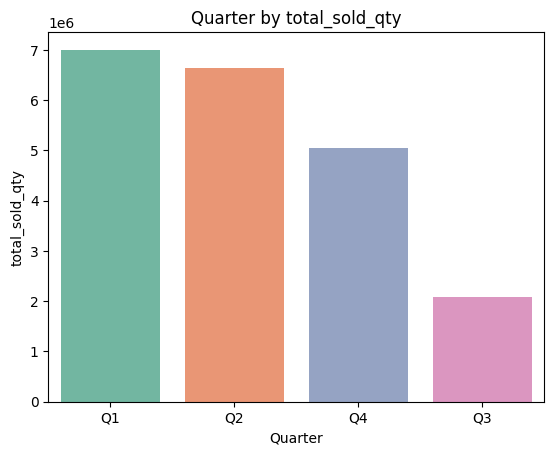

In [88]:
sns.barplot(x='Quarter', y= 'total_sold_qty', data=df,palette='Set2')
plt.title('Quarter by total_sold_qty')
plt.show()